# <font color=2ec19b>Cropping calls</font>
<a href="https://mojdo.ai/"><img src="https://media-exp1.licdn.com/dms/image/C4D0BAQEbWT50W-VbLQ/company-logo_100_100/0?e=2159024400&v=beta&t=WOkub2Uufk0fQ7UCUOjpvOumInekV2K7hHpzjkaEwyY" style="max-width: 400px" alt="Modjo"/></a>

<b><blockquote>This is a simple code made on my sunday night. The goal is reached without using Neural networks.</blockquote>
<blockquote>Here's a python Lib to use in advanced real world project :
<a href="https://github.com/pyannote/pyannote-audio">pyannote</a></blockquote>
<hr>

In [1]:
import numpy as np
import librosa

import pydub as pdb 
from scipy.stats import norm 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the audio file
input_path = 'C:/Users/achra/Downloads/'
filename = 'dd'
extension = '.wav'
output_path = ''

def load_file(input_filename, mono=True, sr=44100):
    x, sr = librosa.load(input_filename, mono=mono, sr=sr)
    return x, sr

x, sr = load_file(input_path + filename + extension)

## Python library librosa allow to visualize a spectogram of our audio file

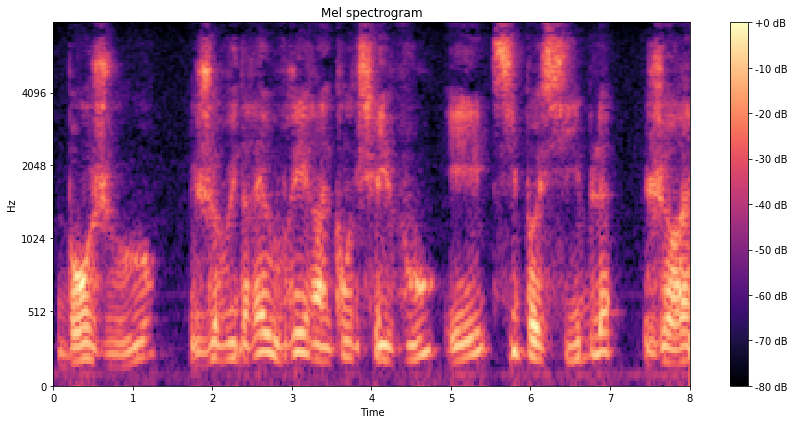

In [3]:
# Sine wave noise removal: spectogram
START = 1 
DUR = 4 

def get_S(x, sr):
    x = np.array(x)
    return librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)

def plot_ms(x, sr):
    import librosa.display
    S = get_S(x, sr)
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()
    
def plot_msvis(x, start, dur, sr):
    end = start + dur
    x_vis = x[start*sr:end*sr]
    plot_ms(x_vis, sr)
    
plot_msvis(x, START, DUR, sr)

## Listen to the .wav on the notebook

In [4]:
test_wave = pdb.AudioSegment.from_wav('C:/Users/achra/Downloads/dd1_1hYyENVZ.wav')
test_wave =test_wave.set_channels(1) # set stereo to mono

In [5]:
test_wave

#### Detect regions where there is silence

In [6]:
silent_regions = pdb.silence.detect_silence(test_wave,min_silence_len=500,silence_thresh=-35)

In [7]:
np_wave = test_wave.get_array_of_samples()

In [8]:
db_values = np.array(np_wave)
normalized_db = db_values/np.max(db_values)
audio_regions = normalized_db[0:50000]

In [9]:
#1000 units is 1 sec 
time_axis= np.arange(0,normalized_db.size)
normalized_time = time_axis/(test_wave.frame_rate/1000)

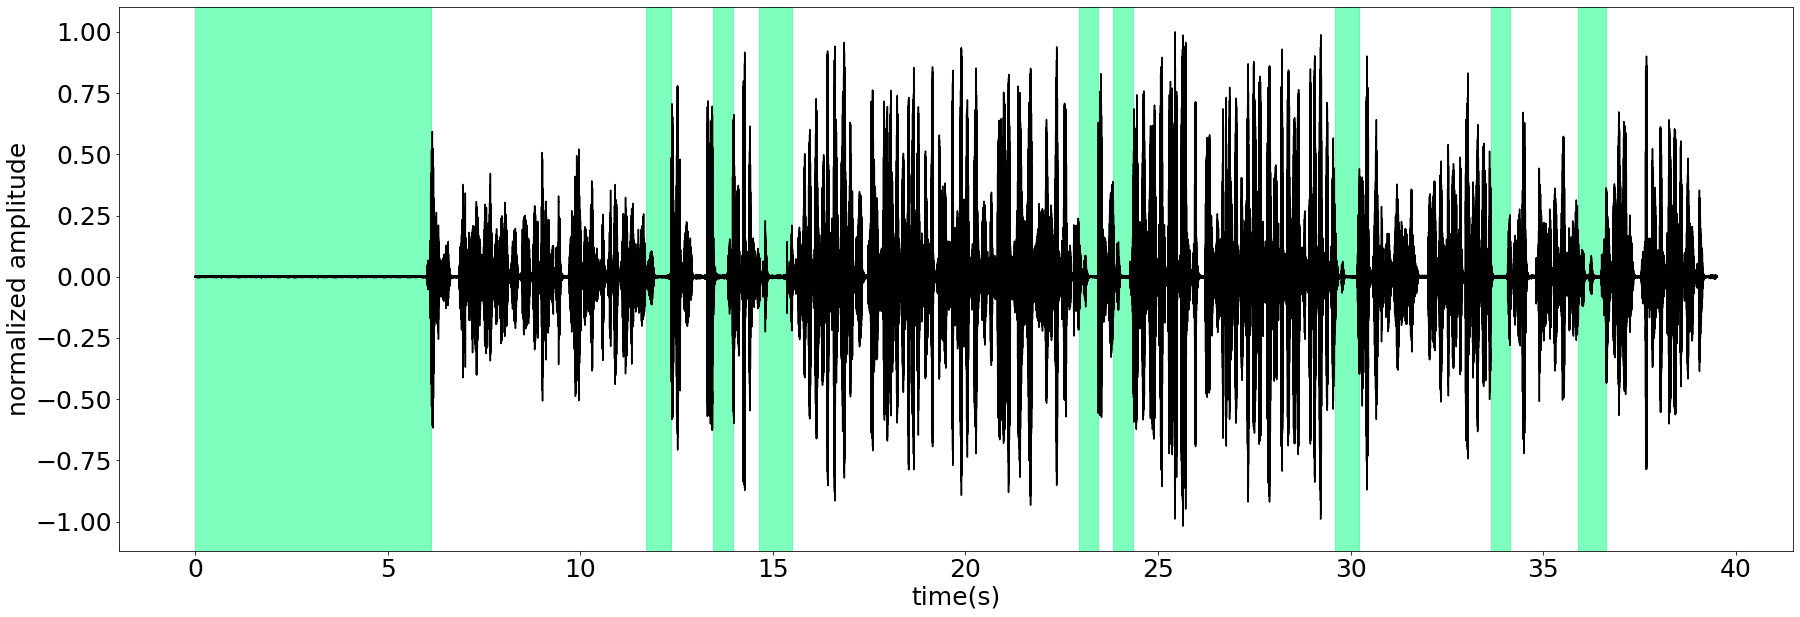

In [22]:
plt.rc("font", size = 25)
fig, ax = plt.subplots(figsize=(30,10))
for i in range(len(silent_regions)): 
    region = silent_regions[i]
    left_side= region[0]/1000
    right_side= region[1]/1000
    ax.axvspan(left_side,right_side, alpha=0.5, color='springgreen')
ax.plot(normalized_time/1000, normalized_db, color='black')
plt.xlabel("time(s)")
plt.ylabel("normalized amplitude")
plt.show()

In [13]:
print("number of channels {}".format(test_wave.channels))
print("frame count {}".format(test_wave.frame_count()))
print("sampling rate {}".format(test_wave.frame_rate))

number of channels 1
frame count 1896000.0
sampling rate 48000


In [14]:
region = silent_regions[0]

In [15]:
silent_region = test_wave[region[0]:region[1]]

In [16]:
silent_region

In [17]:
# silent region sizes 
region_sizes =[]
for sing_region in silent_regions: 
    region_sizes.append(sing_region[1]-sing_region[0])
reg_size_array = np.array(region_sizes)

# as 1000 units is 1 sec,, we should divide by 1000 to get real lengh
reg_size_array = reg_size_array/1000
reg_size_array

array([6.131, 0.651, 0.506, 0.851, 0.509, 0.509, 0.632, 0.501, 0.727])

# Filter out the silent moments

In [18]:
from pydub import AudioSegment

In [19]:
def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    trim_ms = 0 # ms

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

sound = AudioSegment.from_file("C:/Users/achra/Downloads/dd1_1hYyENVZ.wav", format="wav")

start_trim = detect_leading_silence(sound)
end_trim = detect_leading_silence(sound.reverse())

duration = len(sound)    
trimmed_sound = sound[start_trim:duration-end_trim]

In [20]:
trimmed_sound

In [21]:
test_wave

## `The audio difference from test_wave is definitely noticeable`